In [1]:
!pip install pandas


[notice] A new release of pip is available: 24.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [6]:
df = pd.read_csv('dataset.csv')
df.head()

,event,province_id,province,hospital_id,hospital,date,time,sex,age,area,type,transport,litigant,protection,alcohol,transport_by,Refer-Admit,treatment,duration
0,ปีใหม่ 51,10,กรุงเทพมหานคร,11630,กรุงเทพ,3,12:01-13:00 น.,หญิง,54,ในเมือง,ผู้ชับขี่,รถเก๋ง/แท็กซี่,ไม่มี/ล้มเอง,เข็มขัด,ไม่ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0
1,ปีใหม่ 51,10,กรุงเทพมหานคร,11548,กรุงเทพคริสเตียน,2,21:01-22:00 น.,หญิง,13,ในเมือง,ผู้ชับขี่,จักรยานยนต์,รถตู้,ใส่หมวก,ไม่ดื่ม,มูลนิธิ/อาสาสมัคร,admit,ทุเลา/หาย,0
2,ปีใหม่ 51,10,กรุงเทพมหานคร,11548,กรุงเทพคริสเตียน,31,03:01-04:00 น.,หญิง,0,ในเมือง,ผู้โดยสาร,จักรยานยนต์,ปิคอัพ,ไม่ใส่,ไม่ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0
3,ปีใหม่ 51,10,กรุงเทพมหานคร,11548,กรุงเทพคริสเตียน,31,03:01-04:00 น.,หญิง,0,ในเมือง,ผู้โดยสาร,จักรยานยนต์,ปิคอัพ,ใส่หมวก,ไม่ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0
4,ปีใหม่ 51,10,กรุงเทพมหานคร,11548,กรุงเทพคริสเตียน,31,03:01-04:00 น.,ชาย,0,ในเมือง,ผู้ชับขี่,จักรยานยนต์,ปิคอัพ,ใส่หมวก,ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0


In [ ]:
df.info()
df.describe(include="all")                   # quick stats
df.isna().mean().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214950 entries, 0 to 214949
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   event         214950 non-null  object
 1   province_id   214950 non-null  int64 
 2   province      214950 non-null  object
 3   hospital_id   214950 non-null  int64 
 4   hospital      214950 non-null  object
 5   date          214950 non-null  int64 
 6   time          214950 non-null  object
 7   sex           214950 non-null  object
 8   age           214950 non-null  int64 
 9   area          214950 non-null  object
 10  type          214950 non-null  object
 11  transport     214950 non-null  object
 12  litigant      214950 non-null  object
 13  protection    214950 non-null  object
 14  alcohol       214950 non-null  object
 15  transport_by  214950 non-null  object
 16  Refer-Admit   214950 non-null  object
 17  treatment     214950 non-null  object
 18  duration      214950 non

event           0.0
Refer-Admit     0.0
transport_by    0.0
alcohol         0.0
protection      0.0
litigant        0.0
transport       0.0
type            0.0
treatment       0.0
area            0.0
sex             0.0
time            0.0
date            0.0
hospital        0.0
hospital_id     0.0
province        0.0
province_id     0.0
age             0.0
duration        0.0
dtype: float64

## Format time column

In [10]:
pat = r'(?P<start>\d{1,2}:\d{2})\s*[–-]\s*(?P<end>\d{1,2}:\d{2})'  # handles - or – and spaces

df[['start','end']] = df['time'].str.extract(pat)

# (optional) convert to time objects
df['start'] = pd.to_datetime(df['start'], format='%H:%M', errors='coerce').dt.time
df['end']   = pd.to_datetime(df['end'],   format='%H:%M', errors='coerce').dt.time

In [11]:
df.head()

,event,province_id,province,hospital_id,hospital,date,time,sex,age,area,...,transport,litigant,protection,alcohol,transport_by,Refer-Admit,treatment,duration,start,end
0,ปีใหม่ 51,10,กรุงเทพมหานคร,11630,กรุงเทพ,3,12:01-13:00 น.,หญิง,54,ในเมือง,...,รถเก๋ง/แท็กซี่,ไม่มี/ล้มเอง,เข็มขัด,ไม่ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0,12:01:00,13:00:00
1,ปีใหม่ 51,10,กรุงเทพมหานคร,11548,กรุงเทพคริสเตียน,2,21:01-22:00 น.,หญิง,13,ในเมือง,...,จักรยานยนต์,รถตู้,ใส่หมวก,ไม่ดื่ม,มูลนิธิ/อาสาสมัคร,admit,ทุเลา/หาย,0,21:01:00,22:00:00
2,ปีใหม่ 51,10,กรุงเทพมหานคร,11548,กรุงเทพคริสเตียน,31,03:01-04:00 น.,หญิง,0,ในเมือง,...,จักรยานยนต์,ปิคอัพ,ไม่ใส่,ไม่ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0,03:01:00,04:00:00
3,ปีใหม่ 51,10,กรุงเทพมหานคร,11548,กรุงเทพคริสเตียน,31,03:01-04:00 น.,หญิง,0,ในเมือง,...,จักรยานยนต์,ปิคอัพ,ใส่หมวก,ไม่ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0,03:01:00,04:00:00
4,ปีใหม่ 51,10,กรุงเทพมหานคร,11548,กรุงเทพคริสเตียน,31,03:01-04:00 น.,ชาย,0,ในเมือง,...,จักรยานยนต์,ปิคอัพ,ใส่หมวก,ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0,03:01:00,04:00:00


In [26]:
for col in df.columns:
  print(df[col].value_counts(dropna=False))

event
ปีใหม่ 51    30866
ปีใหม่ 53    27936
ปีใหม่ 52    27283
ปีใหม่ 56    26649
ปีใหม่ 55    26131
ปีใหม่ 54    25998
ปีใหม่ 57    25970
ปีใหม่ 58    24117
Name: count, dtype: int64
province_id
30    9835
50    7930
20    7221
40    6779
31    6097
      ... 
85     812
37     796
23     771
75     590
97     535
Name: count, Length: 77, dtype: int64
province
นครราชสีมา     9835
เชียงใหม่      7930
ชลบุรี         7221
ขอนแก่น        6779
บุรีรัมย์      6097
               ... 
ระนอง           812
อำนาจเจริญ      796
ตราด            771
สมุทรสงคราม     590
บึงกาฬ          535
Name: count, Length: 77, dtype: int64
hospital_id
10819    1758
10741    1402
10670    1225
10666    1214
10674    1169
         ... 
11754       1
11632       1
11659       1
11885       1
12269       1
Name: count, Length: 1206, dtype: int64
hospital
บางละมุง                          1758
วชิระภูเก็ต                       1402
มหาราชนครราชสีมา                  1262
ขอนแก่น                           1225
เชียงรา

In [27]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# --------------------------------------------
# (Optional) Thai font config: uncomment a font you have installed
# plt.rcParams["font.family"] = "Tahoma"
# plt.rcParams["font.family"] = "Noto Sans Thai"
plt.rcParams["font.family"] = "TH Sarabun New"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.dpi"] = 140
# --------------------------------------------

In [29]:
# Helper: simple bar plot (top N) for any Series
def plot_top_counts(s: pd.Series, topn=10, title="", xlabel="", ylabel="จำนวน (เคส)"):
    s = s.dropna()
    s = s.groupby(s).size().sort_values(ascending=False).head(topn)
    fig = plt.figure(figsize=(9, 5))
    s.iloc[::-1].plot(kind="barh")    # horizontal, small labels read easier
    plt.title(title)
    plt.xlabel(xlabel or ylabel)
    plt.ylabel("")
    for i, (v, x) in enumerate(zip(s.iloc[::-1].values, range(len(s)))):
        plt.text(v, x, f" {v}", va="center")
    plt.tight_layout()
    plt.show()

In [30]:
# Helper: bar plot for a Series already counted/sorted
def plot_series_counts(s: pd.Series, title="", xlabel="", ylabel="จำนวน (เคส)"):
    s = s.dropna()
    fig = plt.figure(figsize=(10, 5))
    s.plot(kind="bar")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha="right")
    for i, v in enumerate(s.values):
        plt.text(i, v, f"{int(v)}", ha="center", va="bottom", rotation=90)
    plt.tight_layout()
    plt.show()

In [31]:
# 1) ช่วงเวลาเสี่ยง (สร้างแกนชั่วโมงจาก start หรือแยกจาก time)
def extract_start_hour(df: pd.DataFrame) -> pd.Series:
    if "start" in df.columns:
        # start may be datetime.time or string
        s = pd.to_datetime(df["start"], errors="coerce").dt.hour
        if s.notna().sum() == 0:
            # fall back to parse if strings like "18:01:00"
            s = pd.to_datetime(df["start"].astype(str), errors="coerce").dt.hour
        return s
    elif "time" in df.columns:
        # parse "HH:MM-HH:MM น."
        start = df["time"].astype(str).str.extract(r"(\d{1,2}):\d{2}\s*[–-]")
        return pd.to_numeric(start[0], errors="coerce")
    else:
        return pd.Series([np.nan] * len(df))

C:\Users\Krit0\AppData\Local\Temp\ipykernel_35236\4048931552.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  s = pd.to_datetime(df["start"].astype(str), errors="coerce").dt.hour


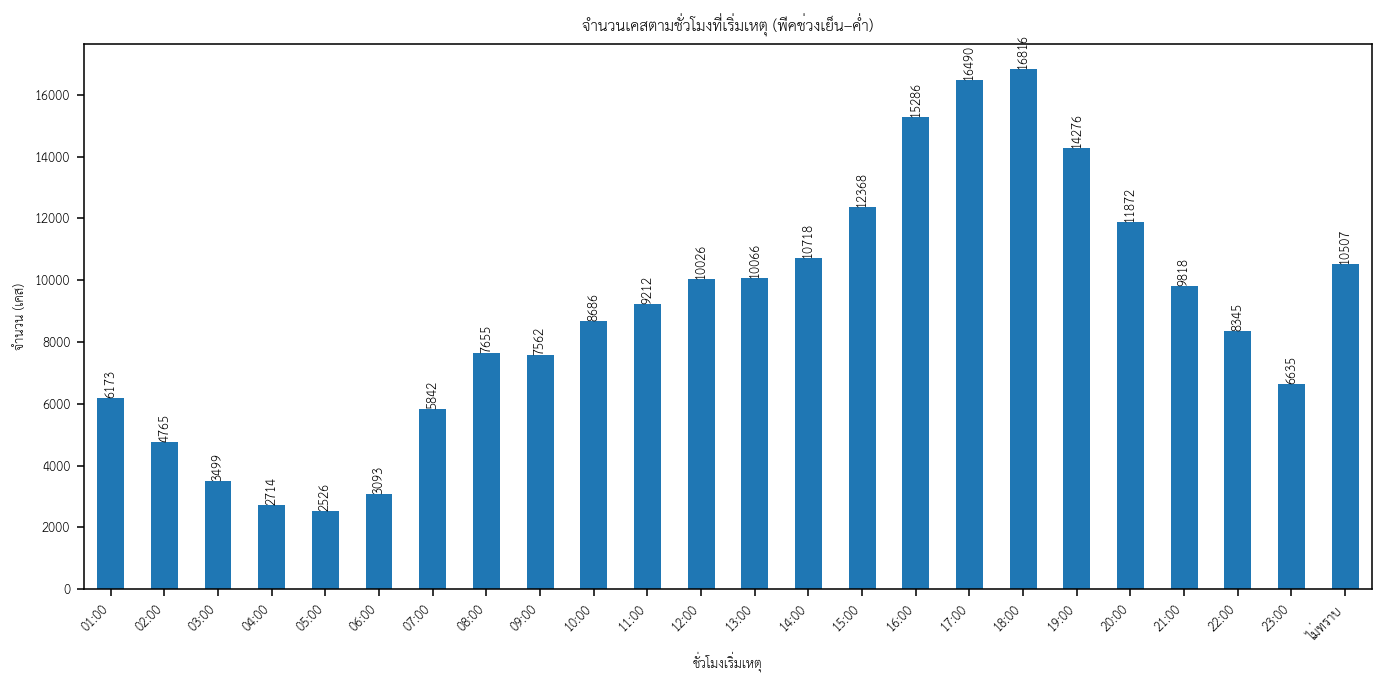

In [38]:
hours = extract_start_hour(df)
hour_counts = hours.value_counts(dropna=False).sort_index()
# Rename NaN bin
hour_counts.index = hour_counts.index.map(lambda x: "ไม่ทราบ" if pd.isna(x) else f"{int(x):02d}:00")

plot_series_counts(hour_counts, title="จำนวนเคสตามชั่วโมงที่เริ่มเหตุ (พีคช่วงเย็น–ค่ำ)", xlabel="ชั่วโมงเริ่มเหตุ")


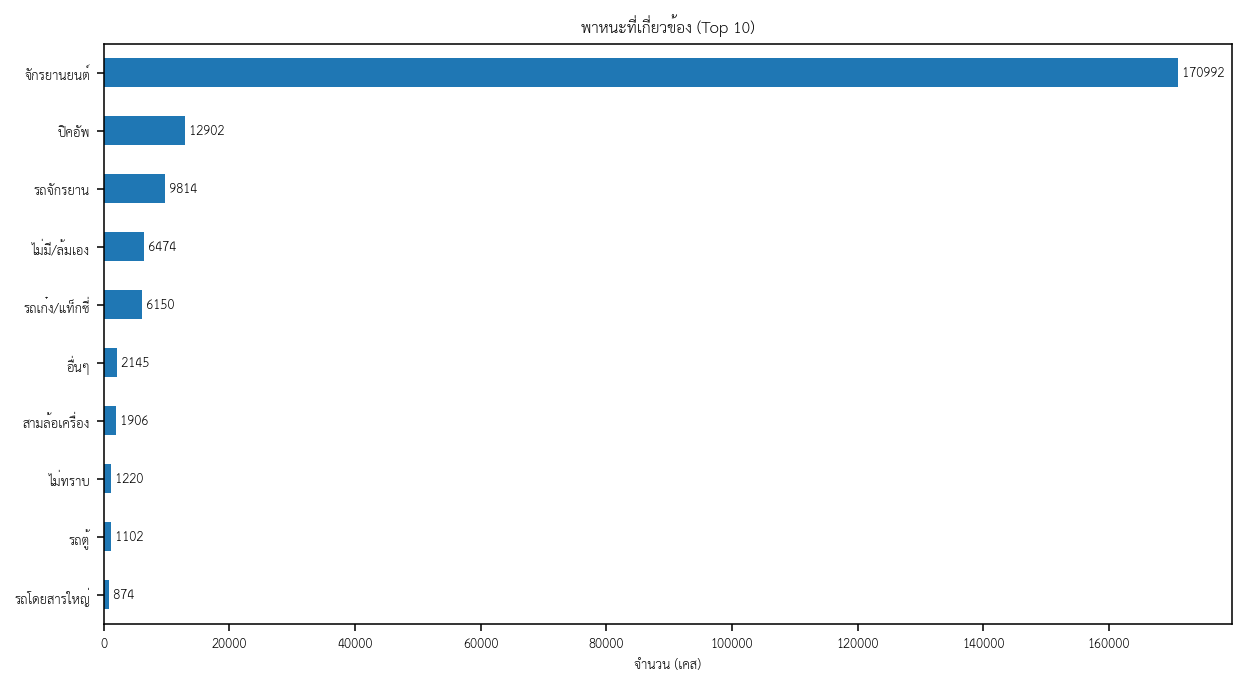

In [39]:
# 2) พาหนะ (top 10)
if "transport" in df.columns:
    plot_top_counts(df["transport"], topn=10, title="พาหนะที่เกี่ยวข้อง (Top 10)")

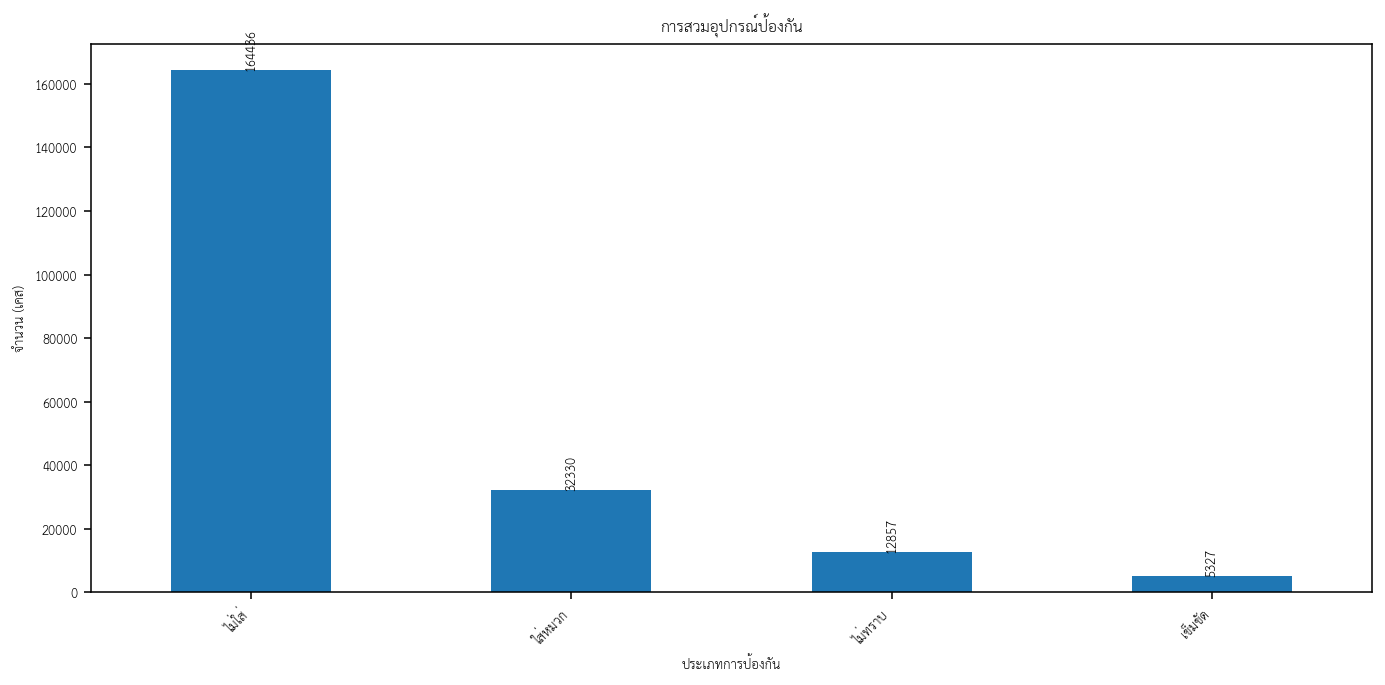

In [41]:
# 3) การสวมอุปกรณ์ป้องกัน
if "protection" in df.columns:
    prot_order = df["protection"].value_counts(dropna=False).sort_values(ascending=False)
    plot_series_counts(prot_order, title="การสวมอุปกรณ์ป้องกัน", xlabel="ประเภทการป้องกัน")

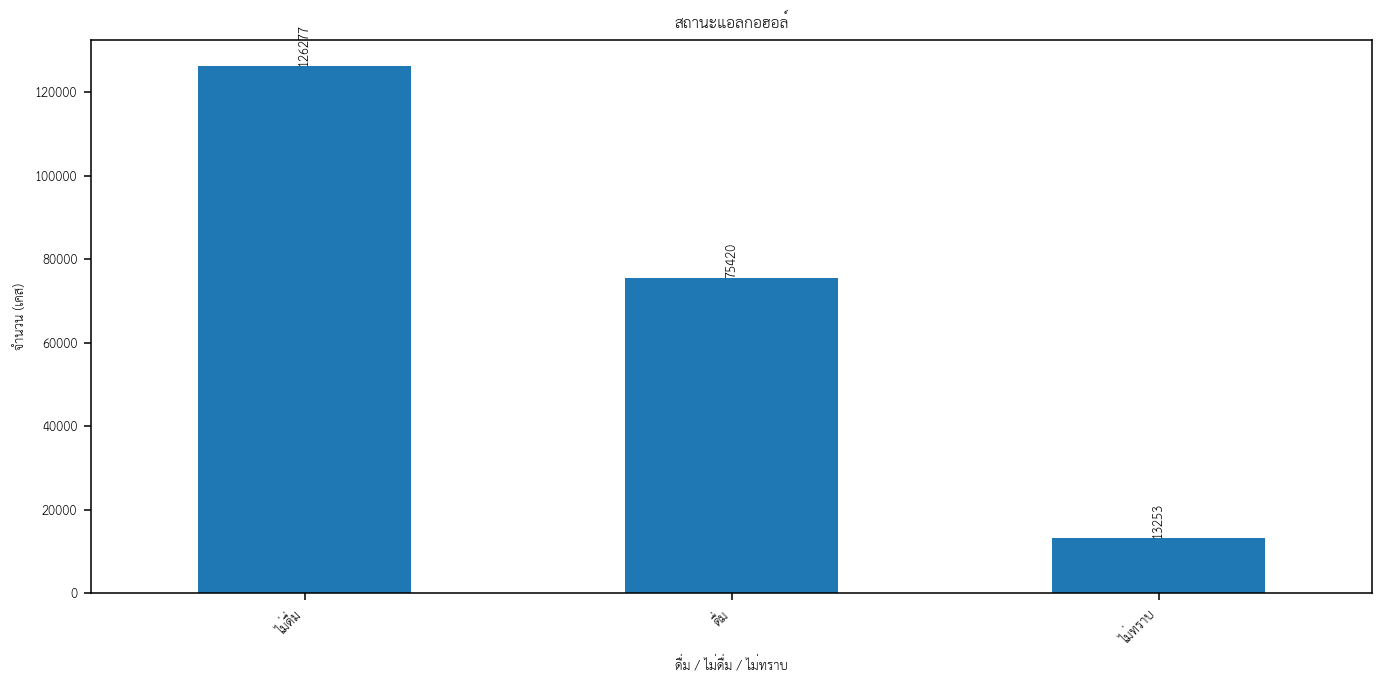

In [42]:
# 4) แอลกอฮอล์
if "alcohol" in df.columns:
    alc = df["alcohol"].value_counts(dropna=False).sort_values(ascending=False)
    plot_series_counts(alc, title="สถานะแอลกอฮอล์", xlabel="ดื่ม / ไม่ดื่ม / ไม่ทราบ")

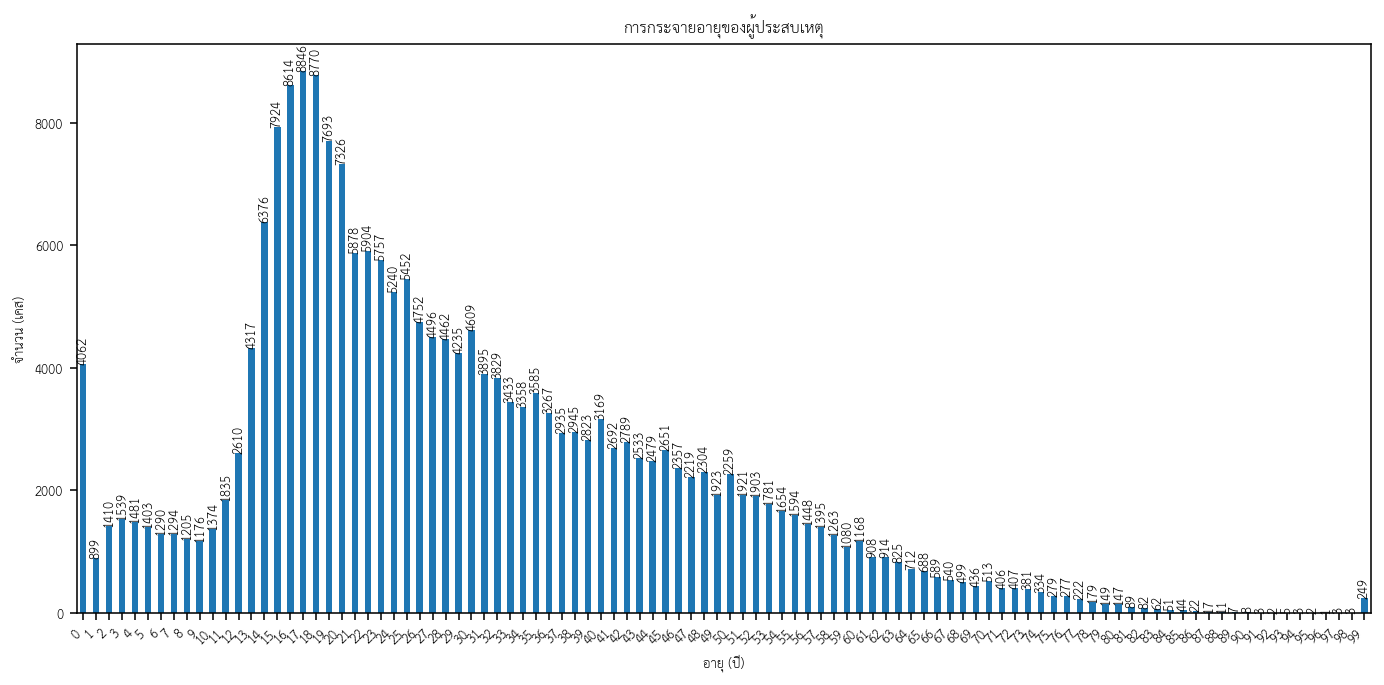

In [43]:
# 5) อายุ (เรียงตามตัวเลข)
if "age" in df.columns:
    ages = pd.to_numeric(df["age"], errors="coerce").dropna().astype(int)
    age_counts = ages.value_counts().sort_index()
    plot_series_counts(age_counts, title="การกระจายอายุของผู้ประสบเหตุ", xlabel="อายุ (ปี)")

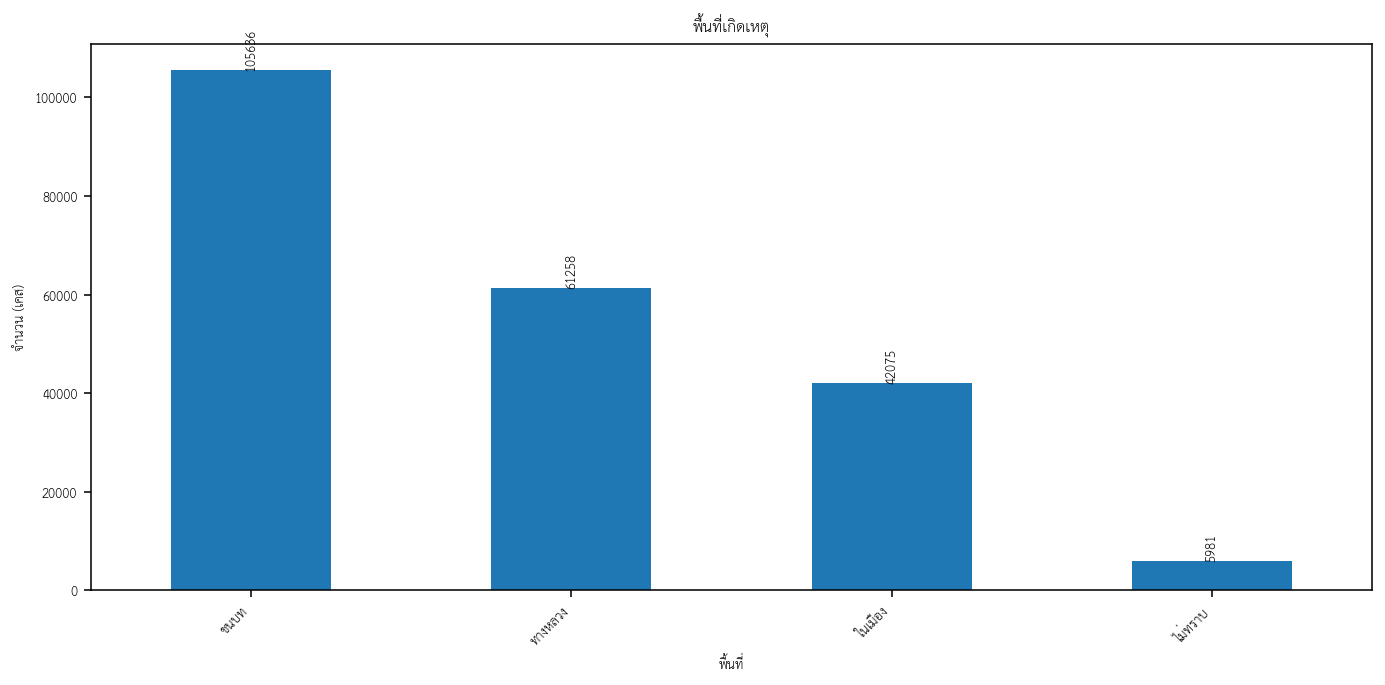

In [44]:
# 6) พื้นที่เกิดเหตุ
if "area" in df.columns:
    area_counts = df["area"].value_counts(dropna=False)
    plot_series_counts(area_counts, title="พื้นที่เกิดเหตุ", xlabel="พื้นที่")

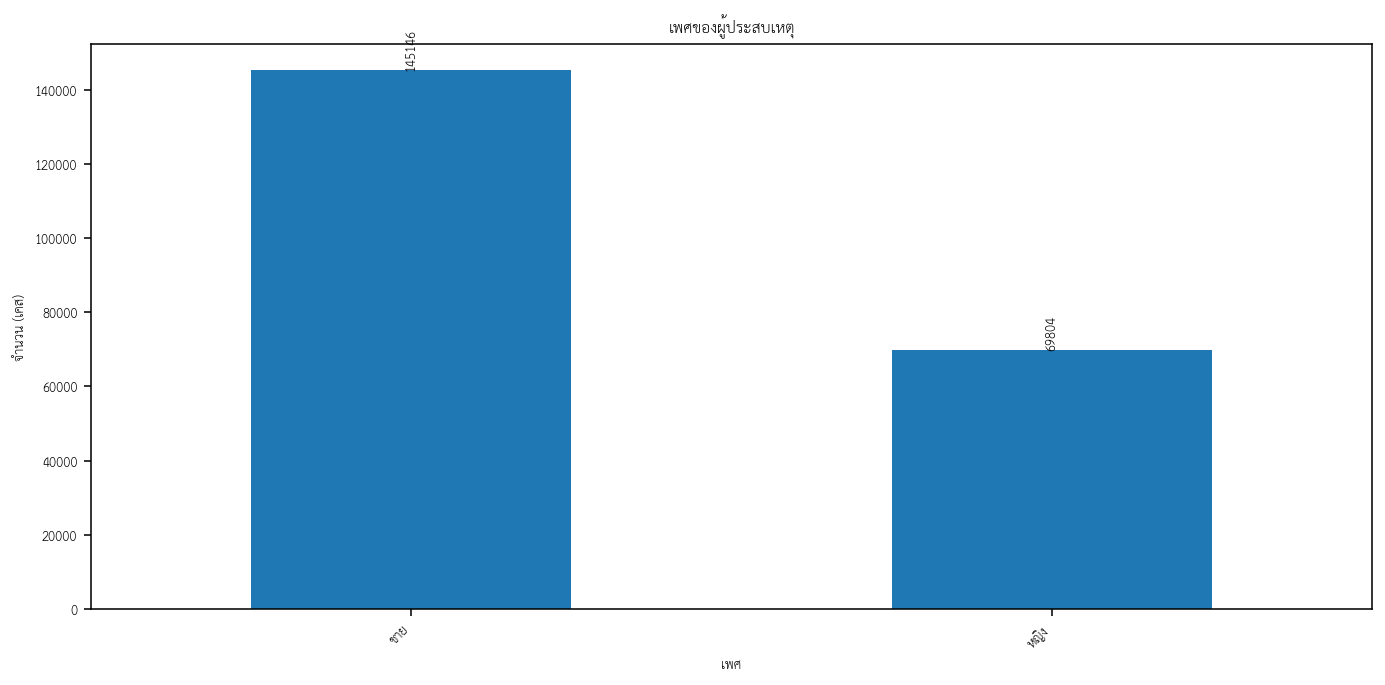

In [46]:
# 7) เพศ
if "sex" in df.columns:
    sex_counts = df["sex"].value_counts(dropna=False)
    plot_series_counts(sex_counts, title="เพศของผู้ประสบเหตุ", xlabel="เพศ")

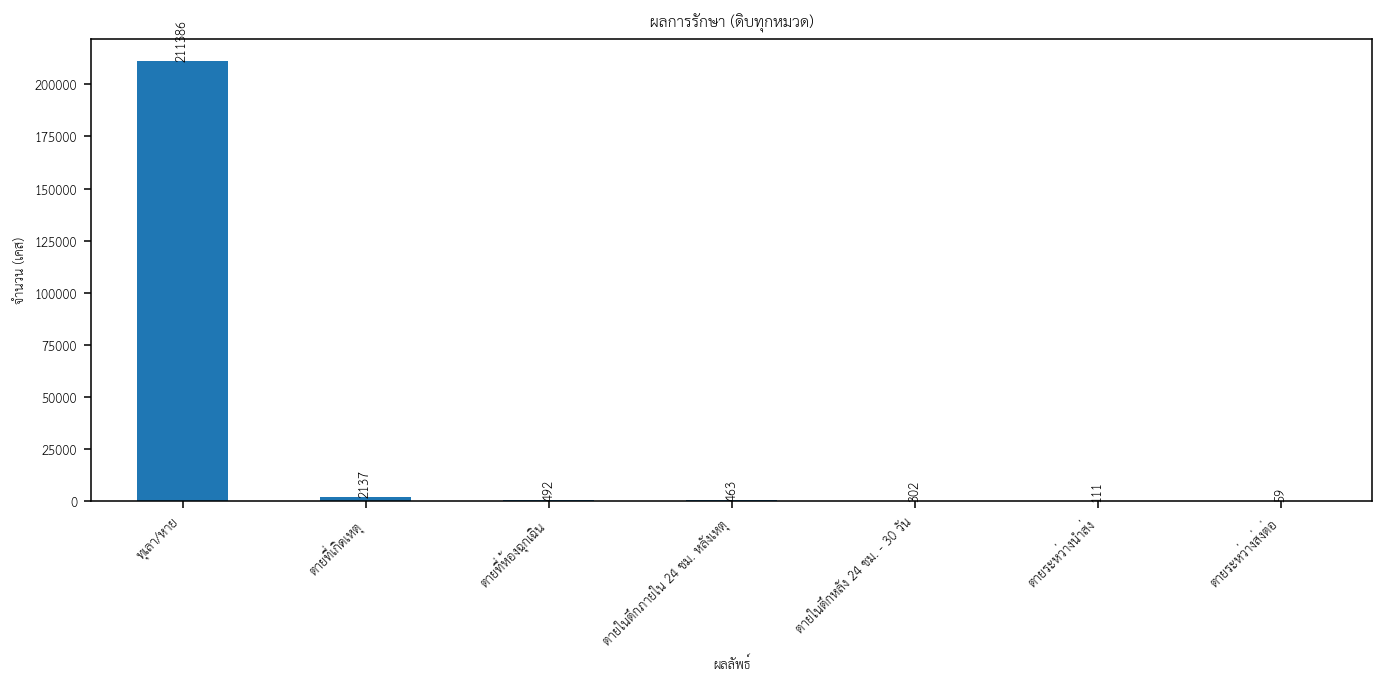

In [57]:
# 8) ผลการรักษา
if "treatment" in df.columns:
    all_counts_raw = df["treatment"].value_counts(dropna=False)
    plot_series_counts(all_counts_raw, title="ผลการรักษา (ดิบทุกหมวด)", xlabel="ผลลัพธ์")

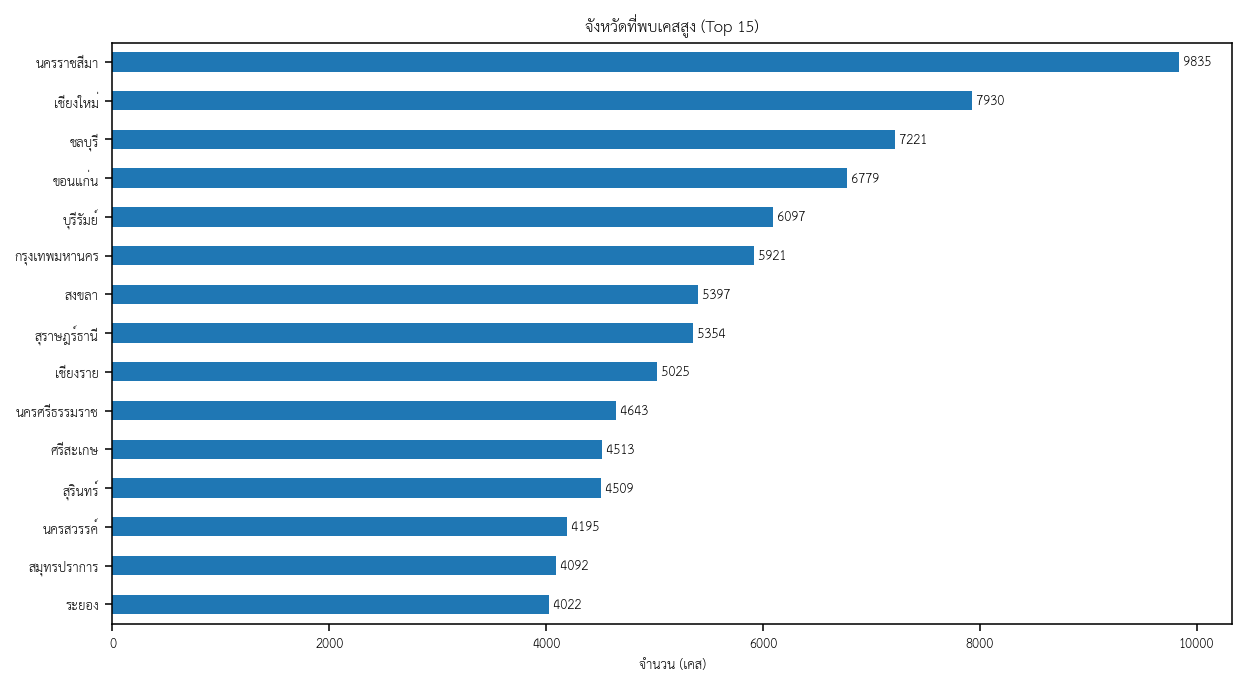

In [51]:
# 9) จังหวัด (Top 15)
if "province" in df.columns:
    plot_top_counts(df["province"], topn=15, title="จังหวัดที่พบเคสสูง (Top 15)")

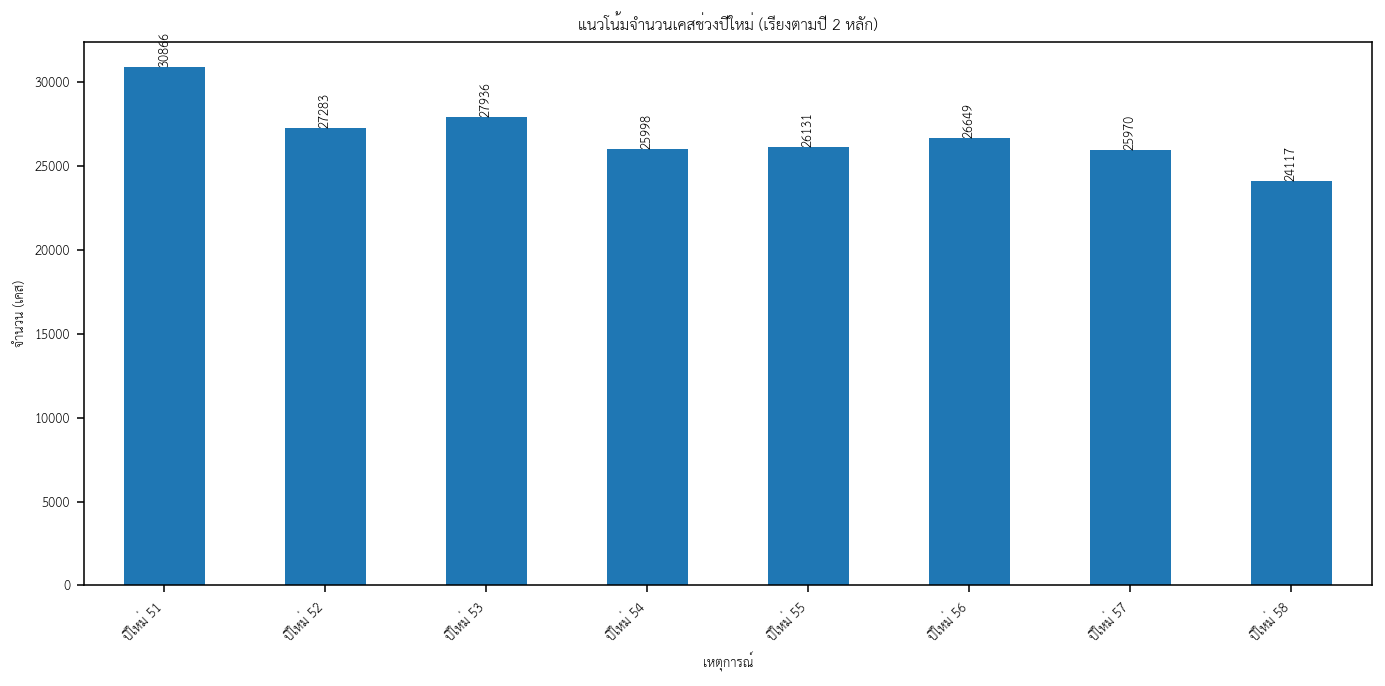

In [52]:
# 10) แนวโน้มปีใหม่ (เรียงตามตัวเลขท้ายชื่อเหตุการณ์ 'ปีใหม่ 51–58')
if "event" in df.columns:
    ev = df["event"].astype(str)
    mask = ev.str.contains(r"ปีใหม่\s*\d{2}")
    ny = ev[mask]
    # ดึงปี 2 หลักท้าย
    year2 = ny.str.extract(r"(\d{2})")[0]
    counts = year2.value_counts().sort_index()
    counts.index = counts.index.map(lambda y: f"ปีใหม่ {y}")
    plot_series_counts(counts, title="แนวโน้มจำนวนเคสช่วงปีใหม่ (เรียงตามปี 2 หลัก)", xlabel="เหตุการณ์")

C:\Users\Krit0\AppData\Local\Temp\ipykernel_35236\914835469.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  s2 = pd.to_datetime(df["start"].astype(str), errors="coerce").dt.hour



[INCIDENT 1] Alcohol x Helmet (เฉพาะ จยย. เวลาเย็น–ดึก):
                         count  severe_cnt  severe_rate
alcohol2 helmet2                                       
ไม่ทราบ  ไม่ใส่/ไม่ทราบ   4704        1948     0.414116
ดื่ม     ไม่ใส่/ไม่ทราบ  41979       14720     0.350652
ไม่ทราบ  ใส่หมวก           651         196     0.301075
ดื่ม     ใส่หมวก          4999        1445     0.289058
ไม่ดื่ม  ไม่ใส่/ไม่ทราบ  41248        7623     0.184809
         ใส่หมวก         10582        1677     0.158477
Cramér’s V (alcohol vs severe): 0.195


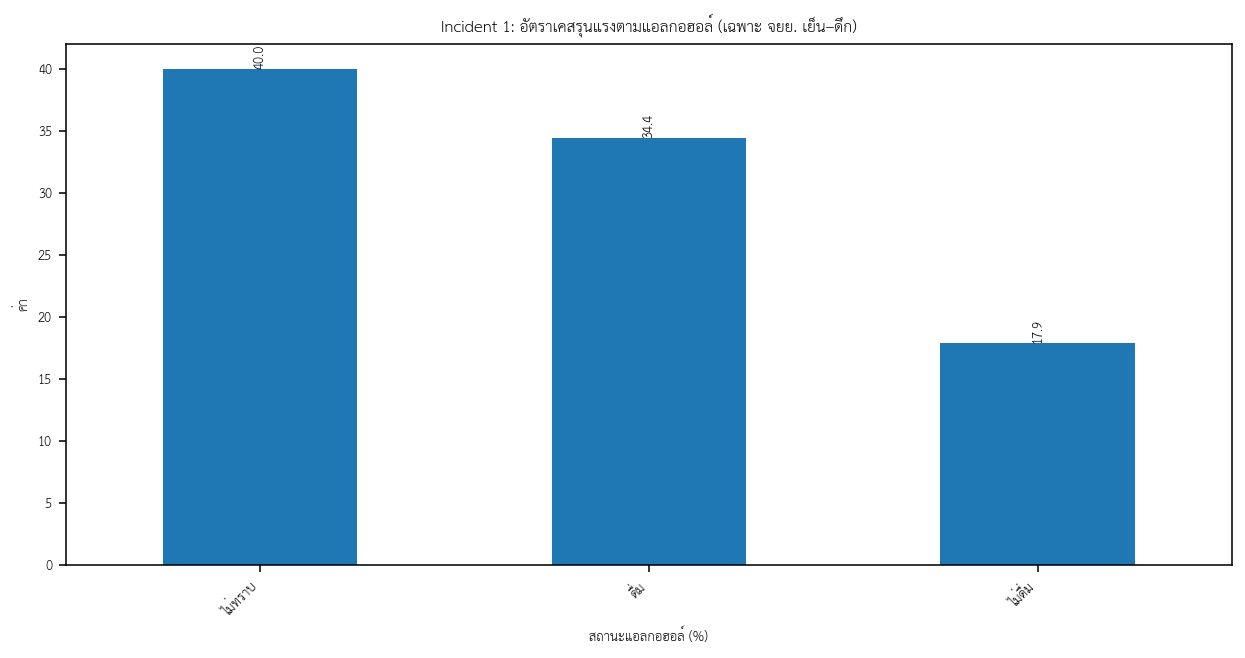


[INCIDENT 2] Area x Hour (วัย 15–24, จยย.):
                          count  severe_cnt  severe_rate
area2   hour_band                                       
ทางหลวง ดึก–ตีสี่(21–04)   3898        1237     0.317342
        ไม่ทราบ             938         292     0.311301
ชนบท    ไม่ทราบ            1939         529     0.272821
ทางหลวง เย็น–ค่ำ(15–20)    6383        1704     0.266959
ชนบท    ดึก–ตีสี่(21–04)   7639        1970     0.257887
        เย็น–ค่ำ(15–20)   13692        3127     0.228382
ทางหลวง กลางวัน(11–14)     2928         641     0.218921
ชนบท    กลางวัน(11–14)     4798         998     0.208003
ทางหลวง เช้า(05–10)        2289         452     0.197466
ชนบท    เช้า(05–10)        3590         695     0.193593


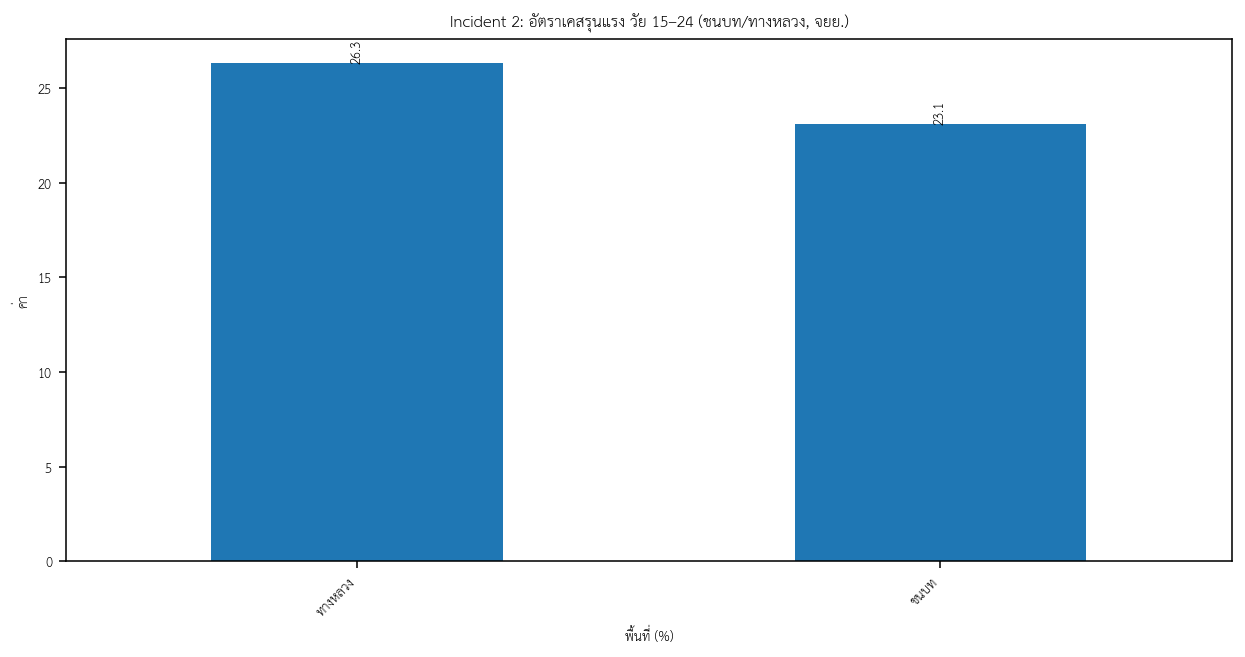


[INCIDENT 3] Province x Alcohol (ท่องเที่ยว, เย็น–ดึก):
                   count  severe_cnt  severe_rate
province alcohol2                                
ภูเก็ต   ไม่ทราบ      60          32     0.533333
ชลบุรี   ดื่ม       1408         365     0.259233
ภูเก็ต   ดื่ม        610         155     0.254098
ชลบุรี   ไม่ทราบ     303          72     0.237624
ภูเก็ต   ไม่ดื่ม    1645         254     0.154407
ชลบุรี   ไม่ดื่ม    2466         277     0.112328


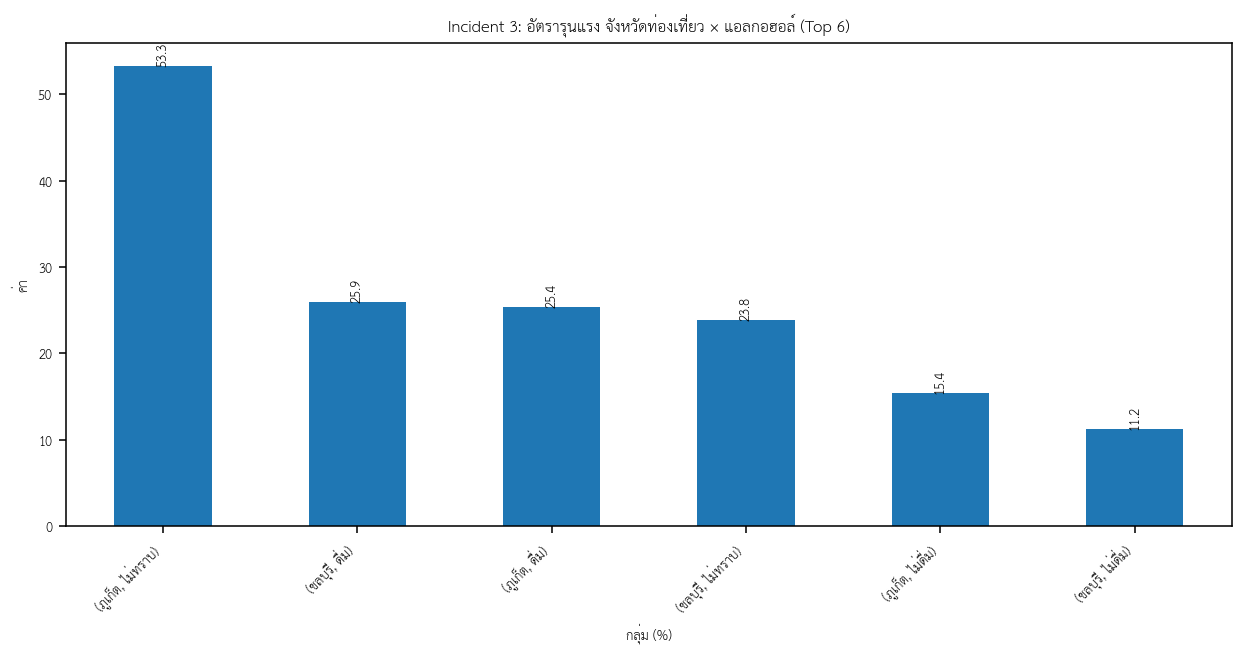


[INCIDENT 4] TransportBy x Area (เย็น–ดึก):
                       count  severe_cnt  severe_rate
transport_by2 area2                                  
EMS/อาสา      ทางหลวง  17452        7338     0.420468
              ชนบท     19417        8068     0.415512
อื่นๆ/ไม่ทราบ ทางหลวง   1852         769     0.415227
EMS/อาสา      ไม่ทราบ   1063         416     0.391345
              ในเมือง   9869        3634     0.368224
อื่นๆ/ไม่ทราบ ชนบท      2599         733     0.282032
              ไม่ทราบ    354          72     0.203390
นำส่งเอง      ชนบท     43414        8619     0.198530
อื่นๆ/ไม่ทราบ ในเมือง    983         192     0.195320
นำส่งเอง      ทางหลวง  15934        2937     0.184323
              ไม่ทราบ   2073         365     0.176073
              ในเมือง  14047        1746     0.124297


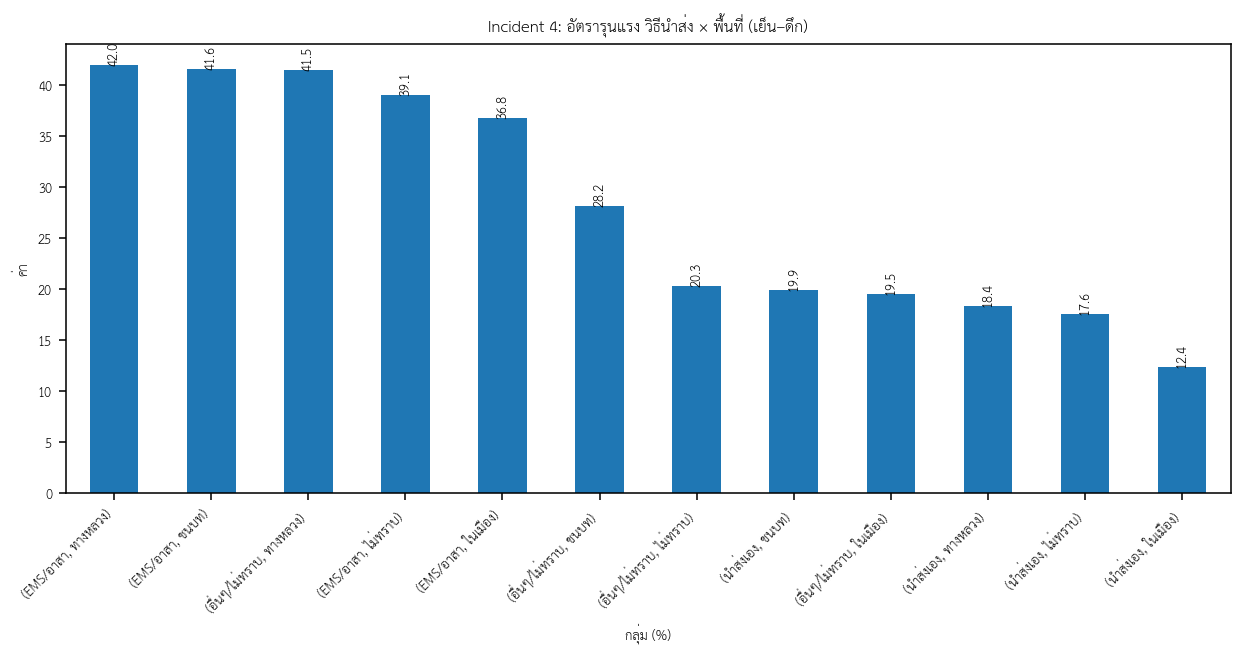


✅ เสร็จ: คำนวณคอลัมน์อนุพันธ์ + กราฟหลัก + ผลการรักษาทุกหมวด + 4 อินซิเดนต์พร้อมตาราง/กราฟ (กันพังแล้ว)


In [60]:
# ============================ CONFIG & IMPORTS ============================
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- Thai font (เลือกแบบที่มีในเครื่องคุณ) ----
# plt.rcParams["font.family"] = "Noto Sans Thai"
# plt.rcParams["font.family"] = "TH Sarabun New"
# plt.rcParams["font.family"] = "Tahoma"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.dpi"] = 140

# ---- หากต้องโหลดไฟล์ ให้ uncomment ----
# df = pd.read_csv("your_file.csv")  # ปรับ path/reader ให้ตรงไฟล์จริง


# ============================ HELPER FUNCTIONS ============================
def extract_start_hour_safe(df: pd.DataFrame) -> pd.Series:
    """ดึงชั่วโมงเริ่มเหตุจากคอลัมน์ start หรือ time โดยไม่พัง"""
    if "start" in df.columns:
        s = pd.to_datetime(df["start"], errors="coerce").dt.hour
        if s.notna().any():
            return s
        # ถ้า start ยังไม่ parse ได้ ลอง cast เป็น str อีกรอบ
        s2 = pd.to_datetime(df["start"].astype(str), errors="coerce").dt.hour
        if s2.notna().any():
            return s2

    if "time" in df.columns:
        # คืน Series ตรง ๆ (expand=False) เลี่ยง index 0 out of bounds
        start_str = df["time"].astype(str).str.extract(r"(\d{1,2}):\d{2}", expand=False)
        return pd.to_numeric(start_str, errors="coerce")

    return pd.Series([pd.NA] * len(df), index=df.index)


def plot_series_counts_safe(s: pd.Series, title="", xlabel="", ylabel="จำนวน"):
    """วาดกราฟแท่งสำหรับ Series โดยเช็คว่างก่อน"""
    s = s.dropna()
    if s.empty:
        print(f"[skip] {title} : ไม่มีข้อมูลหลังทำความสะอาด")
        return
    fig = plt.figure(figsize=(9, 4.8))
    s.plot(kind="bar")
    plt.title(title); plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha="right")
    for i, v in enumerate(s.values):
        try:
            plt.text(i, v, f"{int(v)}", ha="center", va="bottom", rotation=90)
        except Exception:
            pass
    plt.tight_layout(); plt.show()


def barplot_series(s: pd.Series, title, xlabel):
    """วาดกราฟแท่งแบบง่าย ๆ สำหรับชุดค่าอัตรา/จำนวน"""
    s = s.dropna()
    if s.empty:
        print(f"[skip] {title} : ไม่มีข้อมูล")
        return
    fig = plt.figure(figsize=(9, 4.8))
    s.plot(kind="bar")
    plt.title(title); plt.xlabel(xlabel); plt.ylabel("ค่า")
    plt.xticks(rotation=45, ha="right")
    for i, v in enumerate(s.values):
        try:
            label = f"{v:.1f}" if isinstance(v, float) else f"{int(v)}"
            plt.text(i, v, label, ha="center", va="bottom", rotation=90)
        except Exception:
            pass
    plt.tight_layout(); plt.show()


def cramers_v(ct: pd.DataFrame) -> float:
    """คำนวณ Cramér’s V จากตารางไขว้ โดยไม่พึ่ง SciPy"""
    observed = ct.to_numpy()
    n = observed.sum()
    if n == 0:
        return np.nan
    row_s = observed.sum(axis=1, keepdims=True)
    col_s = observed.sum(axis=0, keepdims=True)
    expected = row_s @ col_s / n
    mask = expected > 0
    chi2 = ((observed - expected) ** 2 / np.where(mask, expected, 1)).sum()
    k = min(ct.shape)  # min(#rows, #cols)
    return float(np.sqrt(chi2 / (n * (k - 1)))) if k > 1 else np.nan


def freq_rate_table(df_sub, cat, target="severe"):
    """สรุป count/severe_cnt/severe_rate สำหรับคอลัมน์ (หรือหลายคอลัมน์) cat"""
    if isinstance(cat, (list, tuple)):
        g = df_sub.groupby(cat)[target].agg(["count", "sum", "mean"])
    else:
        g = df_sub.groupby([cat])[target].agg(["count", "sum", "mean"])
    g = g.rename(columns={"sum": "severe_cnt", "mean": "severe_rate"})
    return g.sort_values("severe_rate", ascending=False)


def transgrp(x):
    x = str(x)
    if "ผู้ประสบเหตุ/ญาติ" in x:
        return "นำส่งเอง"
    if x in ["FR", "BLS", "ALS", "ILS", "มูลนิธิ/อาสาสมัคร"]:
        return "EMS/อาสา"
    return "อื่นๆ/ไม่ทราบ"


def hour_band(x):
    if pd.isna(x): return "ไม่ทราบ"
    x = int(x)
    if 5 <= x <= 10:  return "เช้า(05–10)"
    if 11 <= x <= 14: return "กลางวัน(11–14)"
    if 15 <= x <= 20: return "เย็น–ค่ำ(15–20)"
    if x >= 21 or x <= 4: return "ดึก–ตีสี่(21–04)"
    return "ไม่ทราบ"


# ============================ DERIVED COLUMNS ============================
df2 = df.copy()

# ชั่วโมงเริ่มเหตุ + band
hours = extract_start_hour_safe(df2)
df2["hour_band"] = hours.map(hour_band)

# อายุ band
age = pd.to_numeric(df2.get("age"), errors="coerce")
bins = [-1, 14, 24, 44, 64, 200]
labels = ["≤14", "15–24", "25–44", "45–64", "65+"]
df2["age_band"] = pd.cut(age, bins=bins, labels=labels)

# ผลการรักษาแบบรวม "ตาย" -> "เสียชีวิต"
treat = df2["treatment"].astype(str)
df2["treat_norm"] = np.where(treat.str.contains("ตาย", na=False), "เสียชีวิต", treat)

# ธงความรุนแรง (เสียชีวิต หรือ admit ใด ๆ)
is_fatal = (df2["treat_norm"] == "เสียชีวิต")
adm_col = "Refer-Admit" if "Refer-Admit" in df2.columns else "refer_admit"
is_admit = df2.get(adm_col, pd.Series(index=df2.index, dtype=object)).astype(str).str.contains("admit", case=False, na=False)
df2["severe"] = np.where(is_fatal | is_admit, 1, 0)

# ตัวแปรสนับสนุน
df2["alcohol2"] = df2.get("alcohol", pd.Series(index=df2.index)).fillna("ไม่ทราบ")
df2["helmet2"]  = (df2.get("protection", pd.Series(index=df2.index))
                    .replace({"ใส่หมวก": "ใส่หมวก", "เข็มขัด": "เข็มขัด"})
                    .where(df2.get("protection", pd.Series(index=df2.index)).isin(["ใส่หมวก", "เข็มขัด"]),
                           "ไม่ใส่/ไม่ทราบ"))
df2["is_moto"]  = np.where(df2.get("transport", pd.Series(index=df2.index)).astype(str)
                           .str.contains("จักรยานยนต์", na=False),
                           "จักรยานยนต์", "อื่นๆ")
df2["area2"]    = df2.get("area", pd.Series(index=df2.index)).fillna("ไม่ทราบ")
df2["transport_by2"] = (df2.get("transport_by", pd.Series(index=df2.index)).map(transgrp)
                        if "transport_by" in df2.columns else pd.Series(["ไม่ทราบ"] * len(df2), index=df2.index))

# ============================ INCIDENTS (3–4 เคส) ============================
# INCIDENT 1: เย็น–ดึก + แอลกอฮอล์ + จยย. + ไม่ใส่หมวก → รุนแรง
inc1 = df2[(df2["hour_band"].isin(["เย็น–ค่ำ(15–20)", "ดึก–ตีสี่(21–04)"])) &
           (df2["is_moto"] == "จักรยานยนต์")]
if not inc1.empty:
    tab1 = freq_rate_table(inc1, ["alcohol2", "helmet2"])
    print("\n[INCIDENT 1] Alcohol x Helmet (เฉพาะ จยย. เวลาเย็น–ดึก):")
    print(tab1)
    ct1 = pd.crosstab(inc1["alcohol2"], inc1["severe"])
    print("Cramér’s V (alcohol vs severe):", round(cramers_v(ct1), 3))
    rate1 = (inc1.groupby("alcohol2")["severe"].mean() * 100).round(1).sort_values(ascending=False)
    barplot_series(rate1, "Incident 1: อัตราเคสรุนแรงตามแอลกอฮอล์ (เฉพาะ จยย. เย็น–ดึก)", "สถานะแอลกอฮอล์ (%)")
else:
    print("[skip] Incident 1: เงื่อนไขกรองแล้วไม่มีข้อมูล")

# INCIDENT 2: ชนบท/ทางหลวง + วัย 15–24 + จยย.
inc2 = df2[(df2["area2"].isin(["ชนบท", "ทางหลวง"])) &
           (df2["age_band"] == "15–24") &
           (df2["is_moto"] == "จักรยานยนต์")]
if not inc2.empty:
    tab2 = freq_rate_table(inc2, ["area2", "hour_band"])
    print("\n[INCIDENT 2] Area x Hour (วัย 15–24, จยย.):")
    print(tab2)
    rate2 = (inc2.groupby("area2")["severe"].mean() * 100).round(1).sort_values(ascending=False)
    barplot_series(rate2, "Incident 2: อัตราเคสรุนแรง วัย 15–24 (ชนบท/ทางหลวง, จยย.)", "พื้นที่ (%)")
else:
    print("[skip] Incident 2: เงื่อนไขกรองแล้วไม่มีข้อมูล")

# INCIDENT 3: จังหวัดท่องเที่ยว (ชลบุรี/ภูเก็ต) + เวลาเย็น–ดึก
tour = ["ชลบุรี", "ภูเก็ต"]
if "province" in df2.columns and df2["province"].isin(tour).any():
    inc3 = df2[df2["province"].isin(tour) &
               df2["hour_band"].isin(["เย็น–ค่ำ(15–20)", "ดึก–ตีสี่(21–04)"])]
    if not inc3.empty:
        tab3 = freq_rate_table(inc3, ["province", "alcohol2"])
        print("\n[INCIDENT 3] Province x Alcohol (ท่องเที่ยว, เย็น–ดึก):")
        print(tab3)
        rate3 = (inc3.groupby(["province", "alcohol2"])["severe"]
                 .mean().sort_values(ascending=False) * 100).round(1).head(6)
        barplot_series(rate3, "Incident 3: อัตรารุนแรง จังหวัดท่องเที่ยว × แอลกอฮอล์ (Top 6)", "กลุ่ม (%)")
    else:
        print("[skip] Incident 3: เงื่อนไขกรองแล้วไม่มีข้อมูล")
else:
    print("[skip] Incident 3: ไม่มีคอลัมน์ 'province' หรือไม่มีค่าใน {ชลบุรี, ภูเก็ต}")

# INCIDENT 4: วิธีการนำส่ง (นำส่งเอง vs EMS) + พื้นที่ (ช่วงเย็น–ดึก)
inc4 = df2[df2["hour_band"].isin(["เย็น–ค่ำ(15–20)", "ดึก–ตีสี่(21–04)"])]
if not inc4.empty:
    tab4 = freq_rate_table(inc4, ["transport_by2", "area2"])
    print("\n[INCIDENT 4] TransportBy x Area (เย็น–ดึก):")
    print(tab4)
    rate4 = (inc4.groupby(["transport_by2", "area2"])["severe"]
             .mean().sort_values(ascending=False) * 100).round(1)
    barplot_series(rate4, "Incident 4: อัตรารุนแรง วิธีนำส่ง × พื้นที่ (เย็น–ดึก)", "กลุ่ม (%)")
else:
    print("[skip] Incident 4: เงื่อนไขกรองแล้วไม่มีข้อมูล")

print("\n✅ เสร็จ: คำนวณคอลัมน์อนุพันธ์ + กราฟหลัก + ผลการรักษาทุกหมวด + 4 อินซิเดนต์พร้อมตาราง/กราฟ (กันพังแล้ว)")



[INCIDENT 1] Alcohol x Helmet (เฉพาะ จยย. เวลาเย็น–ดึก):
                         count  severe_cnt  severe_rate
alcohol2 helmet2                                       
ไม่ทราบ  ไม่ใส่/ไม่ทราบ   4704        1948     0.414116
ดื่ม     ไม่ใส่/ไม่ทราบ  41979       14720     0.350652
ไม่ทราบ  ใส่หมวก           651         196     0.301075
ดื่ม     ใส่หมวก          4999        1445     0.289058
ไม่ดื่ม  ไม่ใส่/ไม่ทราบ  41248        7623     0.184809
         ใส่หมวก         10582        1677     0.158477
Cramér’s V (alcohol vs severe): 0.195


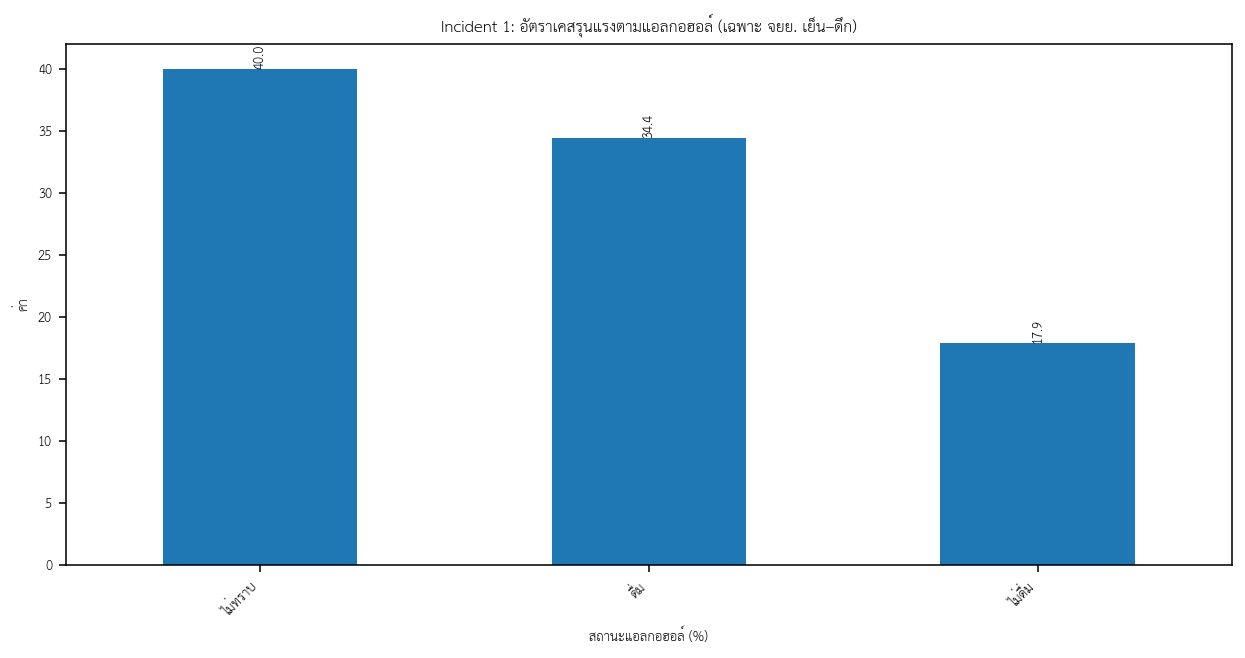

In [ ]:
# INCIDENT 1: เย็น–ดึก + แอลกอฮอล์ + จยย. + ไม่ใส่หมวก → รุนแรง
inc1 = df2[(df2["hour_band"].isin(["เย็น–ค่ำ(15–20)", "ดึก–ตีสี่(21–04)"])) &
           (df2["is_moto"] == "จักรยานยนต์")]
if not inc1.empty:
    tab1 = freq_rate_table(inc1, ["alcohol2", "helmet2"])
    print("\n[INCIDENT 1] Alcohol x Helmet (เฉพาะ จยย. เวลาเย็น–ดึก):")
    print(tab1)
    ct1 = pd.crosstab(inc1["alcohol2"], inc1["severe"])
    print("Cramér’s V (alcohol vs severe):", round(cramers_v(ct1), 3))
    rate1 = (inc1.groupby("alcohol2")["severe"].mean() * 100).round(1).sort_values(ascending=False)
    barplot_series(rate1, "Incident 1: อัตราเคสรุนแรงตามแอลกอฮอล์ (เฉพาะ จยย. เย็น–ดึก)", "สถานะแอลกอฮอล์ (%)")
else:
    print("[skip] Incident 1: เงื่อนไขกรองแล้วไม่มีข้อมูล")

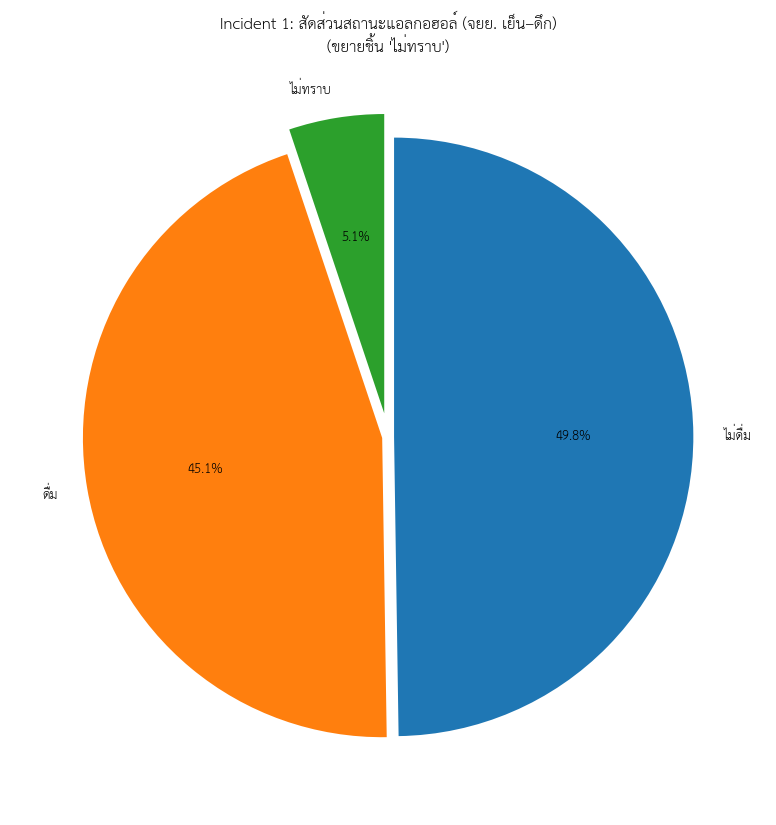

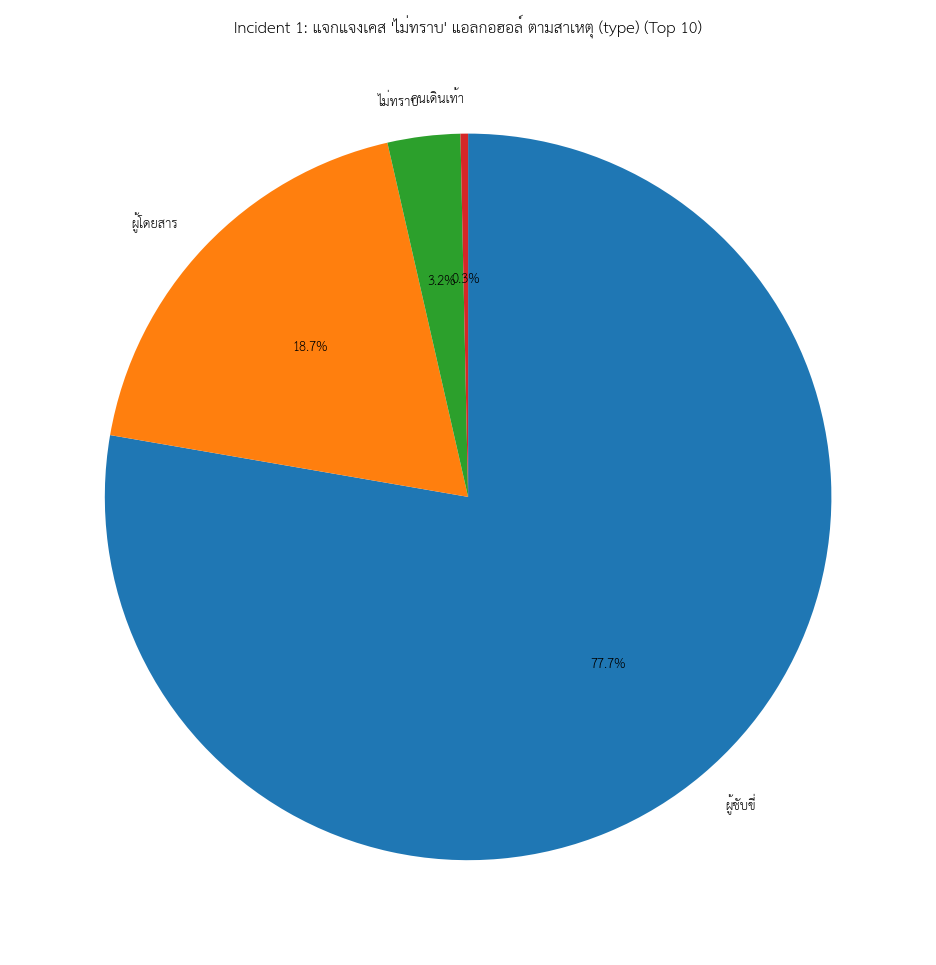

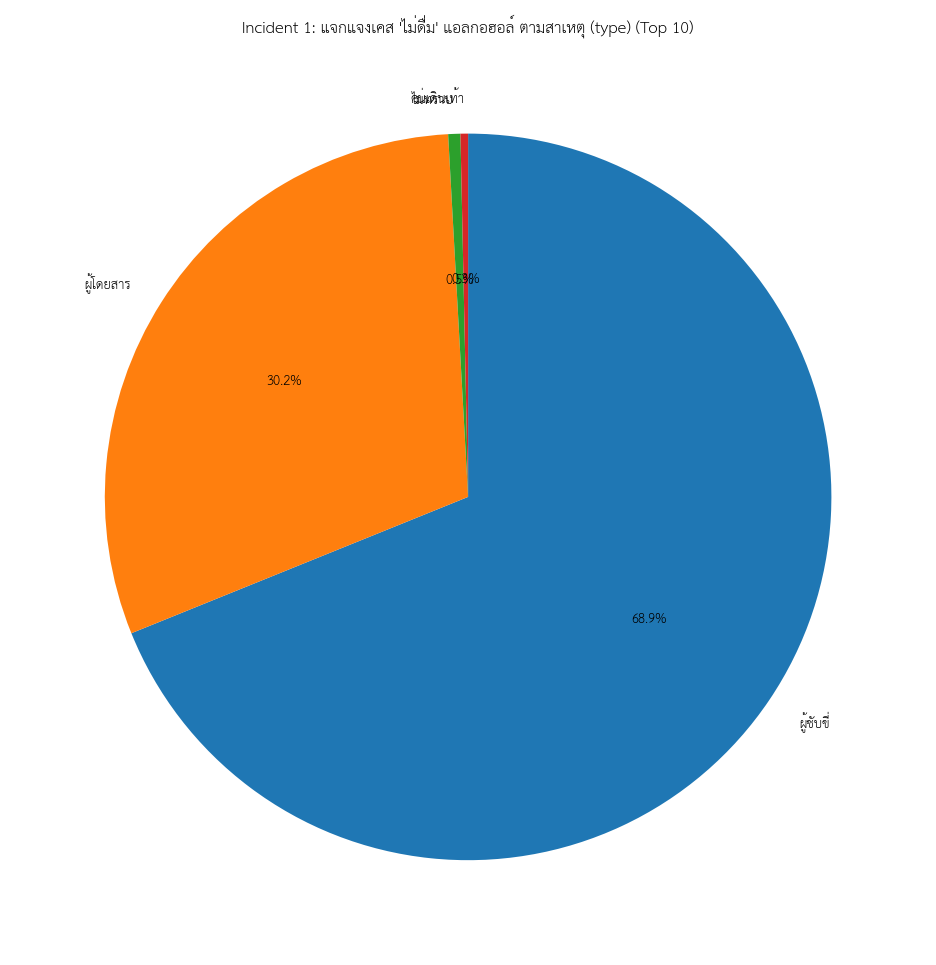

In [67]:
# INCIDENT 1: Pie chart + expand 'ไม่ทราบ' and drill-down by cause
inc1 = df2[(df2["hour_band"].isin(["เย็น–ค่ำ(15–20)", "ดึก–ตีสี่(21–04)"])) &
           (df2["is_moto"] == "จักรยานยนต์")]

if not inc1.empty:
    # --------- PIE 1: Alcohol distribution (explode 'ไม่ทราบ') ----------
    alc_counts = inc1["alcohol2"].value_counts(dropna=False)
    if not alc_counts.empty:
        labels = alc_counts.index.astype(str).tolist()
        sizes  = alc_counts.values
        # สร้าง explode เฉพาะ 'ไม่ทราบ'
        explode = [0.08 if lab == "ไม่ทราบ" else 0.02 for lab in labels]

        fig = plt.figure(figsize=(6, 6))
        plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%",
                startangle=90, counterclock=False)
        plt.title("Incident 1: สัดส่วนสถานะแอลกอฮอล์ (จยย. เย็น–ดึก)\n(ขยายชิ้น 'ไม่ทราบ')")
        plt.tight_layout(); plt.show()
    else:
        print("[skip] Incident 1 pie: ไม่มีข้อมูล alcohol2 หลังกรอง")

    # --------- PIE 2: Drill-down 'ไม่ทราบ' by accident cause ----------
    # เลือกคอลัมน์ที่จะใช้เป็น 'สาเหตุ' ตามลำดับความสำคัญ
    cause_col = None
    for c in ["type"]:
        if c in inc1.columns and inc1[c].notna().any():
            cause_col = c
            break

    if cause_col is not None:
        unknown = inc1[inc1["alcohol2"] == "ไม่ทราบ"]
        if not unknown.empty:
            cause_counts = unknown[cause_col].fillna("ไม่ทราบ").value_counts().head(10)
            if not cause_counts.empty:
                fig = plt.figure(figsize=(7, 7))
                plt.pie(cause_counts.values, labels=cause_counts.index.astype(str),
                        autopct="%1.1f%%", startangle=90, counterclock=False)
                plt.title(f"Incident 1: แจกแจงเคส 'ไม่ทราบ' แอลกอฮอล์ ตามสาเหตุ ({cause_col}) (Top 10)")
                plt.tight_layout(); plt.show()
            else:
                print(f"[skip] Drill-down: '{cause_col}' ว่างทั้งหมดในกลุ่ม 'ไม่ทราบ'")
        else:
            print("[skip] Drill-down: ไม่มีเคส alcohol2 == 'ไม่ทราบ'")
    else:
        print("[skip] Drill-down: ไม่พบคอลัมน์สาเหตุที่ใช้ได้ใน {litigant, transport, type}")

    # --------- PIE 2: Drill-down 'ไ่มดื่ม' by accident cause ----------
    # เลือกคอลัมน์ที่จะใช้เป็น 'สาเหตุ' ตามลำดับความสำคัญ
    cause_col = None
    for c in ["type"]:
        if c in inc1.columns and inc1[c].notna().any():
            cause_col = c
            break

    if cause_col is not None:
        unknown = inc1[inc1["alcohol2"] == "ไม่ดื่ม"]
        if not unknown.empty:
            cause_counts = unknown[cause_col].fillna("ไม่ดื่ม").value_counts().head(10)
            if not cause_counts.empty:
                fig = plt.figure(figsize=(7, 7))
                plt.pie(cause_counts.values, labels=cause_counts.index.astype(str),
                        autopct="%1.1f%%", startangle=90, counterclock=False)
                plt.title(f"Incident 1: แจกแจงเคส 'ไม่ดื่ม' แอลกอฮอล์ ตามสาเหตุ ({cause_col}) (Top 10)")
                plt.tight_layout(); plt.show()
            else:
                print(f"[skip] Drill-down: '{cause_col}' ว่างทั้งหมดในกลุ่ม 'ไม่ทราบ'")
        else:
            print("[skip] Drill-down: ไม่มีเคส alcohol2 == 'ไม่ทราบ'")
    else:
        print("[skip] Drill-down: ไม่พบคอลัมน์สาเหตุที่ใช้ได้ใน {litigant, transport, type}")
else:
    print("[skip] Incident 1: เงื่อนไขกรองแล้วไม่มีข้อมูล")
